In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

* IMDB_Rating - The average score (on a scale of 1 to 10) of those movies is 6.38 and the median score is 6.6
* IMDB_Votes - As one adjunct to data, the IMDb offers a rating scale that allows users to rate films on a scale of one to ten
* MPAA_Rating - 
    * Rated G: General audiences – All ages admitted
    * Rated PG-13: Parents Strongly Cautioned – Some material may be inappropriate for children under 13. 
    * Rated R: Restricted – Under 17 requires accompanying parent or adult guardian. 
    * Rated NC-17: No children under 17 admitted.
    
* Major_Genre
* Production_Budget
* Release_Date
* Rotten_Tomatoes_Rating - Rotten Tomatoes score measures the percentage that are more positive than negative, and assigns an overall fresh or rotten rating to the movie. Scores of over 60 percent are considered fresh, and scores of 59 percent and under are rotten.
* Running_Time_min
* Source
* Title
* US_DVD_Sales
* US_Gross - GDP is the sum of the market values, or prices, of all final goods and services produced in an economy during a period of time
* Worldwide_Gross

#### Import Dataset

In [3]:
movies_data = data.movies()

movies_data.sample(5)

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
2208,The Last Legion,5932060.0,21439015.0,NaN,67000000.0,Aug 17 2007,PG-13,101.0,Weinstein/Dimension,Based on Book/Short Story,Action,Historical Fiction,None,17.0,5.4,12250.0
1573,DÈj‡ Vu,64038616.0,181038616.0,40502497.0,80000000.0,Nov 22 2006,PG-13,126.0,Walt Disney Pictures,Original Screenplay,Thriller/Suspense,Science Fiction,Tony Scott,NaN,7.0,66106.0
2852,The Stepford Wives,59475623.0,96221971.0,NaN,100000000.0,Jun 11 2004,PG-13,93.0,Paramount Pictures,Remake,Comedy,Contemporary Fiction,Frank Oz,26.0,5.1,26712.0
1786,Friday the 13th,65002019.0,91700771.0,9566980.0,17000000.0,Feb 13 2009,R,NaN,Warner Bros.,None,Horror,Fantasy,None,26.0,5.6,26798.0
1670,8MM,36443442.0,96398826.0,NaN,40000000.0,Feb 26 1999,R,119.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Joel Schumacher,22.0,6.3,47753.0


In [4]:
movies_data.shape

(3201, 16)

#### Checking null values are there or not

In [5]:
movies_data.isnull().sum()

Title                        1
US_Gross                     7
Worldwide_Gross              7
US_DVD_Sales              2637
Production_Budget            1
Release_Date                 0
MPAA_Rating                605
Running_Time_min          1992
Distributor                232
Source                     365
Major_Genre                275
Creative_Type              446
Director                  1331
Rotten_Tomatoes_Rating     880
IMDB_Rating                213
IMDB_Votes                 213
dtype: int64

#### Cleaning Data

In [6]:
movies_data.dropna(inplace=True)

movies_data.shape

(174, 16)

#### Describe Data

In [7]:
movies_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
US_Gross,174.0,9.386324e+07,9.707097e+07,2223293.0,25754467.00,54837731.5,1.276575e+08,5.333454e+08
Worldwide_Gross,174.0,2.074873e+08,2.354148e+08,6521829.0,48952480.25,118726700.5,2.651107e+08,1.065660e+09
US_DVD_Sales,174.0,5.392388e+07,6.322215e+07,618454.0,14928605.00,28132953.0,6.764799e+07,3.208309e+08
Production_Budget,174.0,6.680296e+07,6.008128e+07,15000.0,22250000.00,49000000.0,8.500000e+07,3.000000e+08
Running_Time_min,174.0,1.143448e+02,2.011661e+01,78.0,99.25,111.0,1.267500e+02,1.870000e+02
Rotten_Tomatoes_Rating,174.0,5.572414e+01,2.797364e+01,2.0,29.00,61.0,7.900000e+01,9.800000e+01
IMDB_Rating,174.0,6.788506e+00,1.093959e+00,1.7,6.10,7.0,7.600000e+00,8.900000e+00
IMDB_Votes,174.0,6.276755e+04,6.041830e+04,149.0,20571.00,44370.5,8.453100e+04,4.650000e+05


* Let's see the distribution of world wide gross for different films

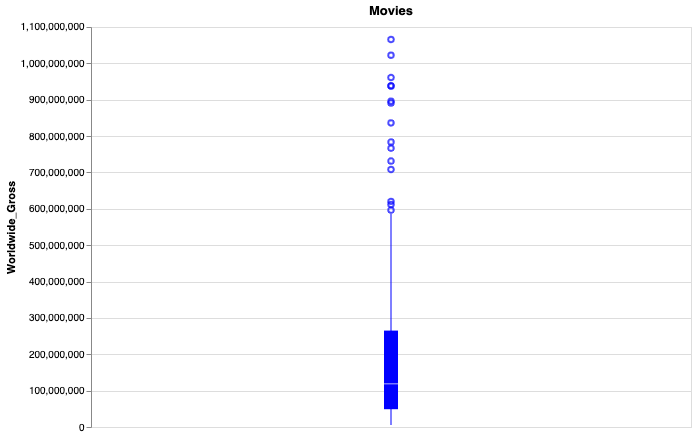

In [8]:
alt.Chart(movies_data, height=400, width=600) \
   .mark_boxplot(color='blue') \
   .encode(y='Worldwide_Gross:Q') \
   .properties(title='Movies')

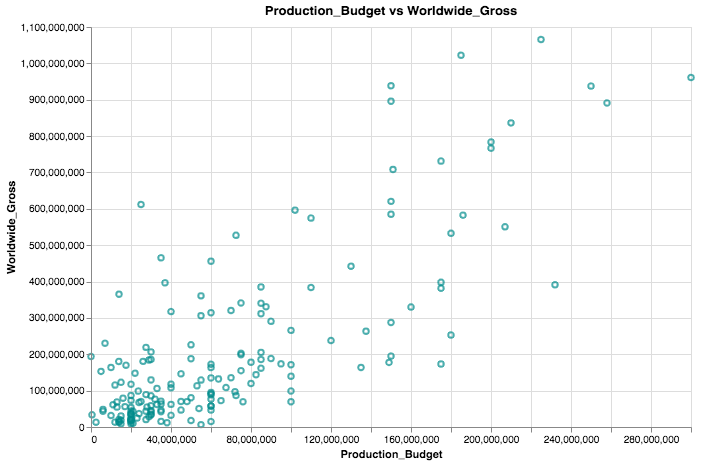

In [9]:
alt.Chart(movies_data, height=400, width=600) \
   .mark_point(color='darkcyan') \
   .encode(x='Production_Budget', 
           y='Worldwide_Gross') \
   .properties(title='Production_Budget vs Worldwide_Gross')

* From here we can see according to categories which kind of movies making more money
* So basically Adventure and Action movies are making more money in the world
* documentory is making very less money

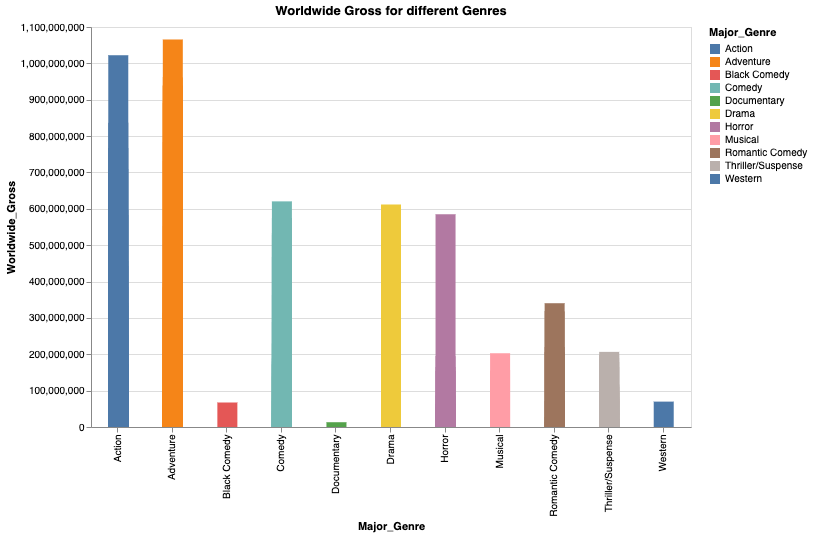

In [9]:
alt.Chart(movies_data, height=400, width=600) \
   .mark_bar(size=20) \
   .encode(x='Major_Genre:O', 
           y='Worldwide_Gross:Q', 
           color='Major_Genre') \
   .properties(title='Worldwide Gross for different Genres')

* Let's see the tomatoes rating median, because median will give more accurate value than average

In [10]:
med_rating = movies_data['Rotten_Tomatoes_Rating'].median()

med_rating

61.0

* Let's make a new column on the basis of tomatoes rating

In [11]:
movies_data['above_average'] = (movies_data['Rotten_Tomatoes_Rating'] - med_rating) > 0

movies_data.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,above_average
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0,False
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0,False
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0,False
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0,True
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0,False


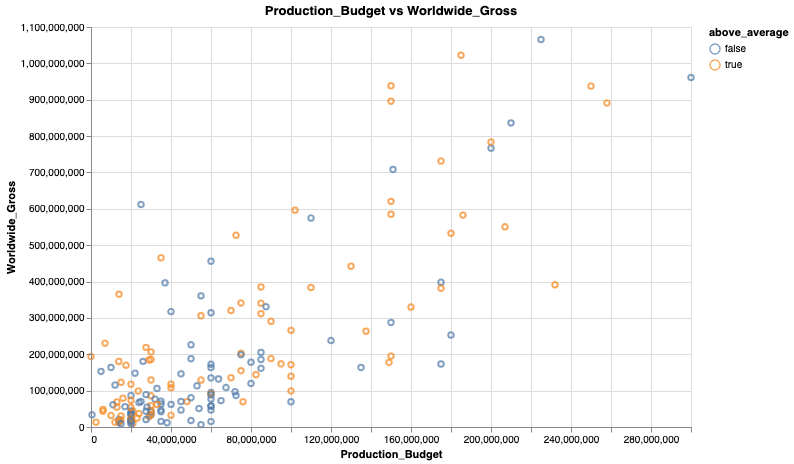

In [12]:
alt.Chart(movies_data, height=400, width=600) \
   .mark_point(color='darkcyan') \
   .encode(x='Production_Budget', 
           y='Worldwide_Gross', 
           color='above_average') \
   .properties(title='Production_Budget vs Worldwide_Gross')

* MPAA_Rating - 
    * Rated G: General audiences – All ages admitted
    * Rated PG-13: Parents Strongly Cautioned – Some material may be inappropriate for children under 13. 
    * Rated R: Restricted – Under 17 requires accompanying parent or adult guardian. 
    * Rated NC-17: No children under 17 admitted.

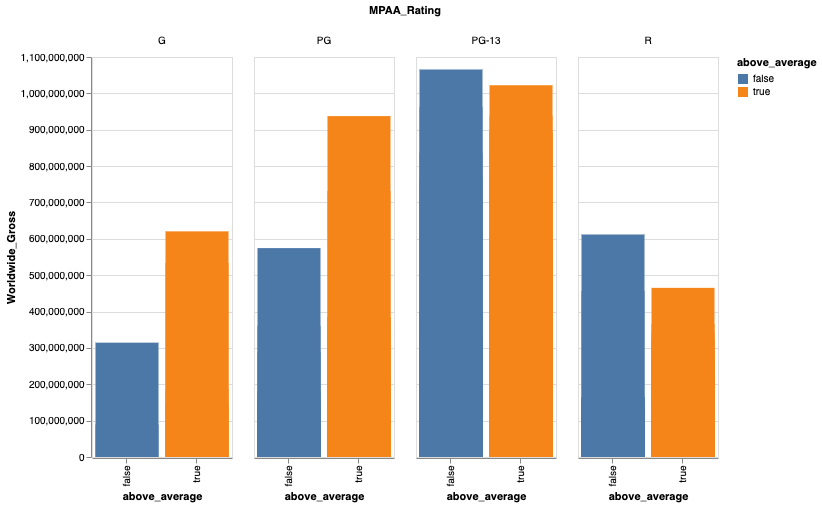

In [14]:
alt.Chart(movies_data, height=400, width=140) \
   .mark_bar() \
   .encode(x='above_average:O', 
           y='Worldwide_Gross:Q', 
           color='above_average:N', 
           column='MPAA_Rating:N')

* Let's see the US gross distribution

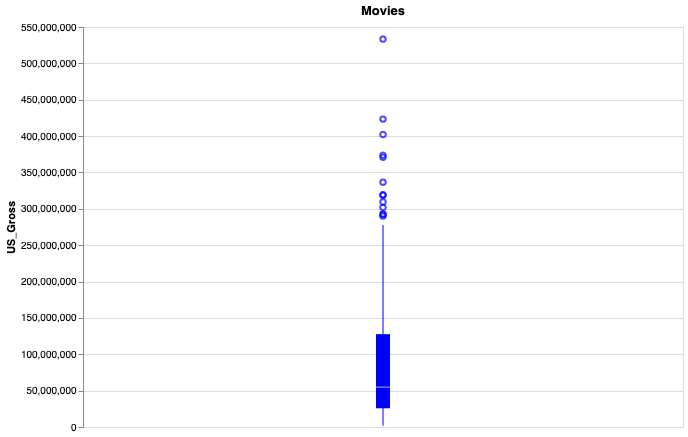

In [15]:
alt.Chart(movies_data, height=400, width=600) \
   .mark_boxplot(color='blue') \
   .encode(y='US_Gross:Q') \
   .properties(title='Movies')

* According to US which has the more income in MPAA Rating. Here also PG-13 making more money

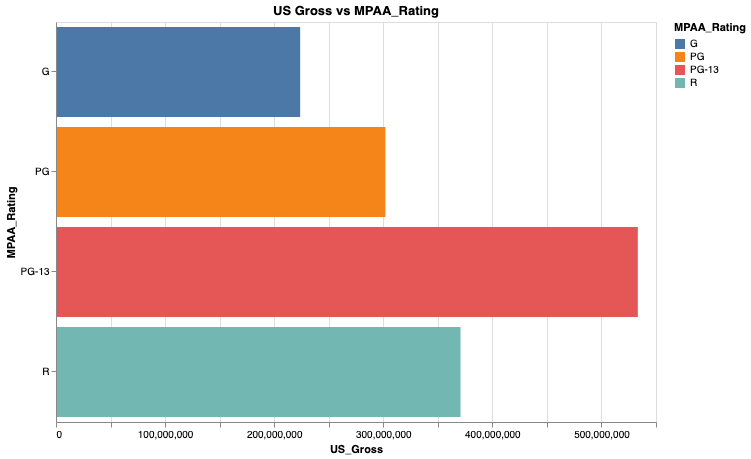

In [16]:
alt.Chart(movies_data, height=400, width=600) \
   .mark_bar() \
   .encode(x='US_Gross', 
           y='MPAA_Rating', 
           color='MPAA_Rating', 
           order=alt.Order('MPAA_Rating', 
                           sort='ascending')) \
   .properties(title='US Gross vs MPAA_Rating')

* Let's take the data only from PG-13 and what kind of films are there

In [17]:
MPAA_PG_13 = movies_data.loc[movies_data['MPAA_Rating'] == 'PG-13']

MPAA_PG_13.sample(5)

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,above_average
2701,School for Scoundrels,17807569.0,17807569.0,13739501.0,20000000.0,Sep 29 2006,PG-13,101.0,MGM,Remake,Comedy,Contemporary Fiction,Todd Phillips,26.0,6.0,15536.0,False
2224,Lucky You,5755286.0,6521829.0,853973.0,55000000.0,May 04 2007,PG-13,122.0,Warner Bros.,Original Screenplay,Drama,Historical Fiction,Curtis Hanson,28.0,5.9,9870.0,False
1821,Gridiron Gang,38432823.0,41480851.0,34066576.0,30000000.0,Sep 15 2006,PG-13,126.0,Sony Pictures,Based on Real Life Events,Drama,Dramatization,Phil Joanou,41.0,6.8,12400.0,False
2871,State of Play,37017955.0,91445389.0,13578224.0,60000000.0,Apr 17 2009,PG-13,127.0,Universal,Based on TV,Thriller/Suspense,Contemporary Fiction,Kevin MacDonald,84.0,7.3,34067.0,True
2828,Superman Returns,200120000.0,391120000.0,81580739.0,232000000.0,Jun 28 2006,PG-13,157.0,Warner Bros.,Based on Comic/Graphic Novel,Adventure,Super Hero,Bryan Singer,76.0,6.6,102751.0,True


* So from this we can see that the main PG-13 movies are Action and adventure

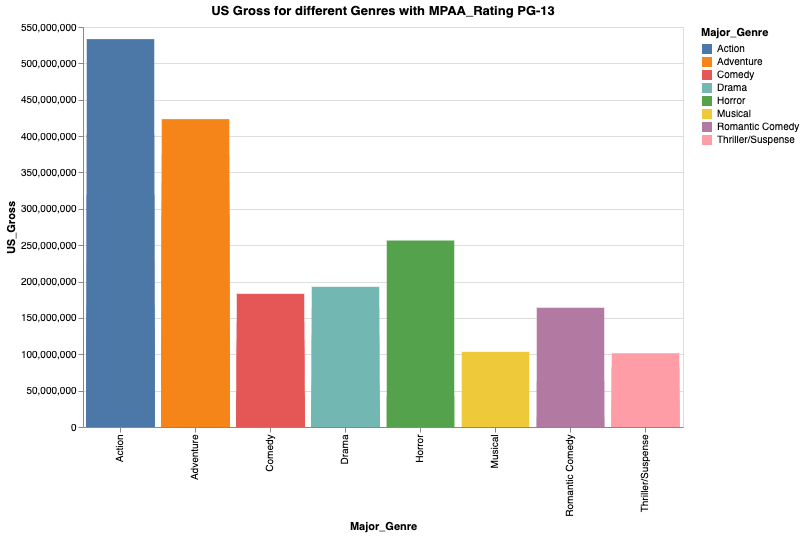

In [20]:
alt.Chart(MPAA_PG_13, height=400, width=600) \
   .mark_bar() \
   .encode(x='Major_Genre:N', 
           y='US_Gross:Q', 
           color='Major_Genre:N') \
   .properties(title='US Gross for different Genres with MPAA_Rating PG-13')